In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker

plt.rcParams.update({
    "figure.dpi": 600,
    "figure.figsize": (6, 2.5),
    "font.size": 8,
    "mathtext.fontset": "stix"
})

In [56]:
# Load vmem simulation data
base_dir = '/Users/susannedahle/CellTypeDependenceElStim/simulation_data/vmem_data_neo' 

vmem_amp_file_paths = [
    os.path.join(base_dir, f'vmem_amp_data_neo_Ez_{i}.npy')
    for i in range(16)
]

vmem_amp_data_list = [
    np.load(path, allow_pickle=True).item()
    for path in vmem_amp_file_paths
]
vmem_amp_data = {}
for data in vmem_amp_data_list:
    vmem_amp_data.update(data)

In [75]:
def plot_endpoint_scatter_2x2(vmem_amp_data):

    fig, axes = plt.subplots(2, 2, figsize=(6, 5), sharex=False, sharey=False)

    freqs = [10, 1000]

    for row in range(2):
        for col, freq in enumerate(freqs):

            ax = axes[row, col]

            x_vals, y_vals, c_vals = [], [], []
            # edge_colors = []

            for cell, data in vmem_amp_data.items():

                # ---- Filter only for second row ----
                if row == 1 and 'L4_BP' in cell:
                    continue

                freqs_arr = np.asarray(data["freq"])
                amps      = np.asarray(data["soma_amp"])

                idx = np.argmin(np.abs(freqs_arr - freq))
                amp = np.abs(amps[idx])

                x_vals.append(data["upper_z_endpoint"])
                y_vals.append(abs(data["bottom_z_endpoint"]))
                c_vals.append(amp)

                # ---- Assign edge color per cell type ----
                # if 'PC' in cell:
                #     edge_colors.append('tab:green')
                # elif 'SS' in cell:
                #     edge_colors.append('tab:purple')
                # else:
                #     edge_colors.append('tab:orange')
                
            x_vals = np.array(x_vals)
            y_vals = np.array(y_vals)
            c_vals = np.array(c_vals)

            # ---- Scatter ----
            sc = ax.scatter(
                x_vals,
                y_vals,
                c=c_vals,
                cmap="viridis",
                s=20,
                # edgecolors=edge_colors,
                # edgecolors='k',
                linewidths=0.3,
                alpha=0.6
            )

            # ---- Individual colorbar ----
            cbar = fig.colorbar(sc, ax=ax)
            cbar.set_label('Soma $V_\\mathrm{m}$ Amplitude [mV]')
            # fmt = ticker.ScalarFormatter(useMathText=True)
            # fmt.set_powerlimits((-2, 2))   # switch to scientific notation if outside [1e-2, 1e2]
            # fmt.set_useOffset(False)
            # cbar.ax.yaxis.set_major_formatter(fmt)

            # ---- Titles ----
            if row == 0:
                ax.set_title(f"{freq} Hz", fontsize=10)
            else:
                ax.set_title(f"{freq} Hz (Without L4_BP)", fontsize=10)
                ax.set_xlabel(r"$|l_1|$")
            
            if col == 0:
                ax.set_ylabel(r"$|l_2|$")


            # ax.set_xlabel(r"$|l_1|$")
            # ax.set_ylabel(r"$|l_2|$")
            # # ax.set_ylim(0,1300)
            #x.set_xlim(0)
            ax.set_ylim(None,1150)

    # Panel labels
    axes[0,0].text(-0.25, 1.08, 'A', transform=axes[0,0].transAxes,
                   fontsize=12, fontweight='bold')
    axes[0,1].text(-0.25, 1.08, 'B', transform=axes[0,1].transAxes,
                   fontsize=12, fontweight='bold')
    axes[1,0].text(-0.25, 1.08, 'C', transform=axes[1,0].transAxes,
                   fontsize=12, fontweight='bold')
    axes[1,1].text(-0.25, 1.08, 'D', transform=axes[1,1].transAxes,
                   fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.savefig('/Users/susannedahle/Documents/Master/Code/fig_pdfs/fig11_new.pdf')
    plt.show()


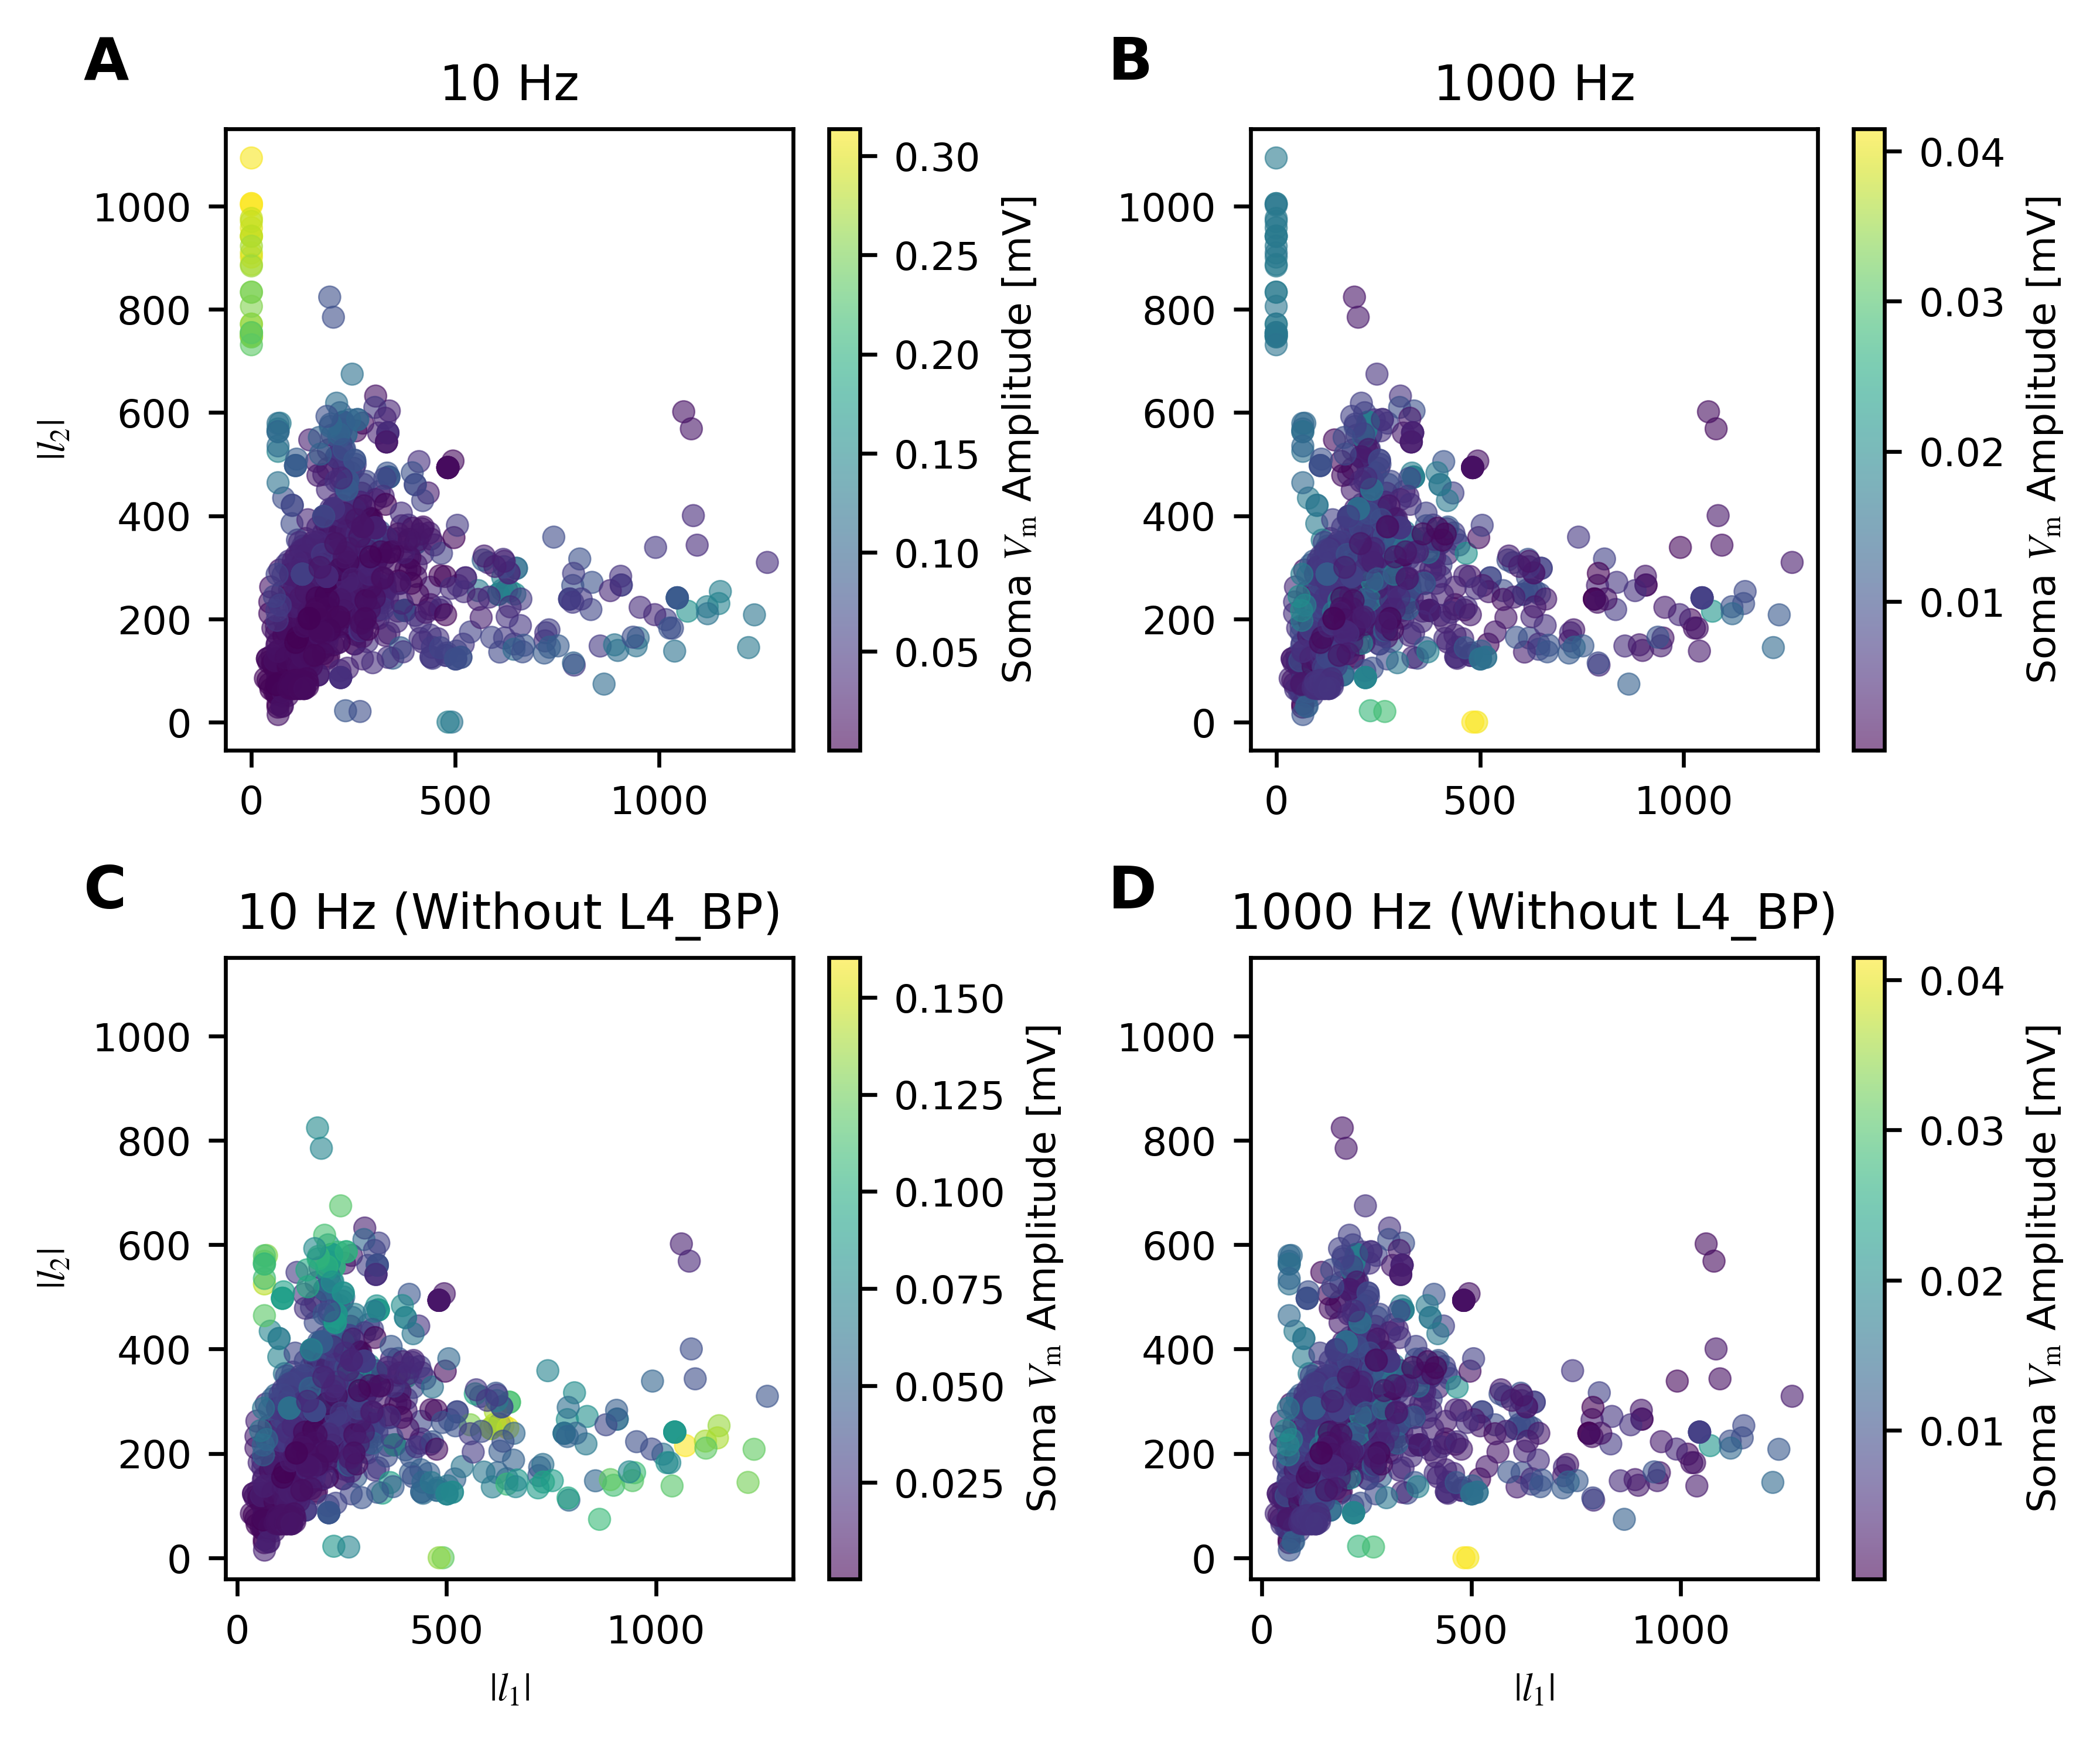

In [76]:
plot_endpoint_scatter_2x2(vmem_amp_data)